# This notebook produces quick diagnostics for a single simulation

#### Preamble / imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

### Data path

In [2]:
# put the relative or absolute directory of the problem output here
dataDir = '../single_level/'
baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'

### Output Path

A sensible default might be dataDir/post

In [3]:
outDir = dataDir+"post/"

Create the output directory if it doesn't exist

In [4]:
%%bash -s "$outDir" 
mkdir -p $1

## Job Information at t=0

In [5]:
string = ds0Path + 'job_info'

In [6]:
# uncomment following display the job info in the notebook

In [7]:
%%bash -s "$string"
#cat $1

## Available variables

In [8]:
ds0 = yt.load(ds0Path)
#ds0.field_list #uncomment to print list of variables in plotfile

## Plots of initial conditions

#### Note in handover period

This is one way to get a lineplot of 1D (base state) data via yt, but there are other ways to do it for basestate data. See e.g. `how_to_read_base_data_without_yt`

### Base state (1D) initial conditions

In [9]:
def linePlotT0(var,ds0Path):
    ds0 = yt.load(ds0Path)
    plot = yt.LinePlot(ds0,var,[0.,0.,0],[0.,1e9,0],64)
    plot.set_log(var, False)
    plot.annotate_title(title="t=0", field=var)
    plot.show()


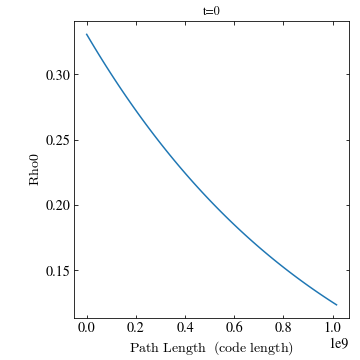

In [10]:
linePlotT0("rho0",ds0Path)

In [11]:
dy = 1e9 / 64
rho0_base = ds0.point([0.,dy/2,0.])['rho0'].value[0]
rho0_top = ds0.point([0.,1e9-dy/2,0.])['rho0'].value[0]

print('rho0(z=bottom cell center)={}'.format(rho0_base)) # / rho0_top / np.exp(1)
print('rho0(z=top cell center)={}'.format(rho0_top))  # / rho0_top / np.exp(1)
print('ratio={}'.format(rho0_base/rho0_top)) 


rho0(z=bottom cell center)=0.33073931275341445
rho0(z=top cell center)=0.12358825179626794
ratio=2.6761387748944756



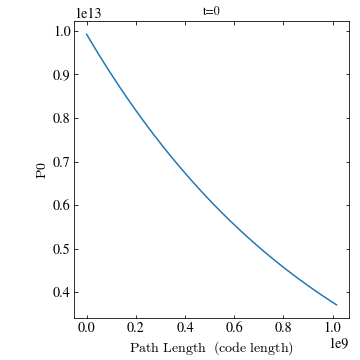

In [12]:
linePlotT0("p0",ds0Path)

In [13]:
# dy = 1e9 / 64
# p0_base = ds0.point([0.,dy/2,0.])['p0'].value[0]
# p0_top = ds0.point([0.,1e9-dy/2,0.])['p0'].value[0]

# print('p0(z=bottom cell center)={}'.format(p0_base)) # / rho0_top / np.exp(1)
# print('p0(z=top cell center)={}'.format(p0_top))  # / rho0_top / np.exp(1)
# print('ratio={}'.format(p0_base/p0_top)) 


In [14]:
#linePlotT0("rhoh0",ds0Path)

In [15]:
#linePlotT0("h0",ds0Path)

In [16]:
#linePlotT0("w0y",ds0Path)

In [17]:
#linePlotT0("w0x",ds0Path)

## Base state evolution

#### Base state evolution - plot all as individual frames
uncomment relevant calls to see

In [18]:
def linePlotFrames(tsPath,var,y0,y1,n):
    ts = yt.load(tsPath)

    for ds in ts:
        plot = yt.LinePlot(ds,var,[0.,y0,0],[0.,y1,0],n)
        plot.set_log(var, False)
        plot.annotate_title(title = "t = {}".format(ds.current_time), field=var )
        plot.show()

In [19]:
y0 = 0.
y1 = 1e9
n = 64
var = "p0"
# linePlotFrames(tsPath,var,y0,y1,n)

In [20]:
y0 = 0.
y1 = 1e9
n = 64
var = "rho0"
#linePlotFrames(tsPath,var,y0,y1,n)

#### Base state evolution - plot all as individual frames with subtraction of t=0 value
(normalisation based on var(z, t=0) possible)

In [21]:
def basesubLinePlotFrames(tsPath,var, normalise=True):
    ts = yt.load(tsPath)

    ds0 = ts[0]
    ray = ds0.ortho_ray(1, (0,0))
    y = np.array(ray['y'])
    linedata0 = np.array(ray[var])

    for ds in ts:
        ray = ds.ortho_ray(1, (0,0))
        linedata = np.array(ray[var])
        linedata = linedata - linedata0
        if normalise:
            linedata = linedata / linedata0
        plt.plot(y, linedata, 'x')
        plt.title("var = {}, t = {}".format(var,ds.current_time))
        plt.show()

In [22]:
var = "p0"
#basesubLinePlotFrames(tsPath,var, normalise=False)

In [23]:
var = "rho0"
#basesubLinePlotFrames(tsPath,var, normalise=True)

In [24]:
var = "w0y"
#basesubLinePlotFrames(tsPath,var, normalise=False)

#### Base state evolution - construct time-distance diagrams

##### Note in handover period

This way of getting 1D lineplots via yt to construct td-diagrams is slow. See e.g. `how_to_read_base_data_without_yt` instead

In [25]:
def basesubTimeDistance(tsPath, var, normalise = True):
    ts = yt.load(tsPath)

    ds0= ts[0]
    ray = ds0.ortho_ray(1, (0,0))
    y = np.array(ray['y'])
    linedata0 = np.array(ray[var])

    dataArr = np.zeros([y.size,len(ts)], dtype='double' )
    time = []
    for i, ds in enumerate(ts):
        ray = ds.ortho_ray(1, (0,0))
        linedata = np.array(ray[var])
        linedata = linedata - linedata0
        if normalise:
            linedata = linedata / linedata0
        dataArr[:,i] = linedata
        time.append(float(ds.current_time))


    plt.contourf(time, y, dataArr, cmap=plt.cm.RdBu_r)
    plt.xlabel('time')
    plt.ylabel('y') 
    plt.title('var = {}'.format(var))
    plt.colorbar()

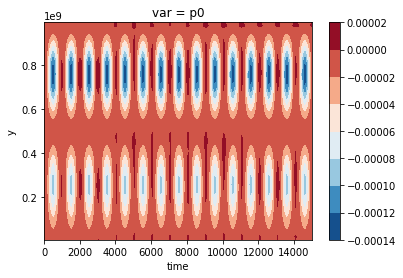

In [26]:
var = "p0"
basesubTimeDistance(tsPath,var, normalise=True)

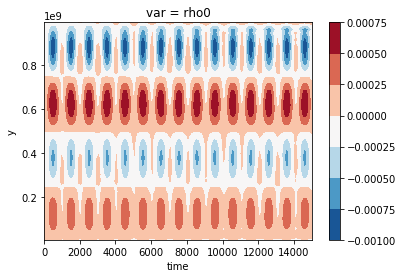

In [27]:
var = "rho0"
basesubTimeDistance(tsPath,var, normalise=True)

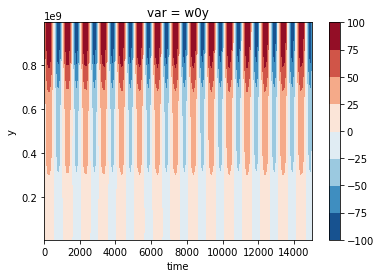

In [28]:
var = "w0y"
basesubTimeDistance(tsPath,var, normalise=False)

## Measured Periods

In [29]:
# Red is data
# Blue is expected 

def quickProbePlot(tsPath,kv_int=2,kh_int=4, cx = 1e9/2, cy = 1e9/4, var='rhopert'):
    
    ts = yt.load(tsPath) # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([cx, cy, 0.])[var].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = kv_int * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)
    print('P(expected)=',2.0*np.pi/w)


    smoothTime = np.linspace(0,2e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r',
        smoothTime, pointdata[0] * np.cos(-w * smoothTime), 'b')

    plt.show()
    
    return

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332
P(expected)= 2027.8893379868061


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


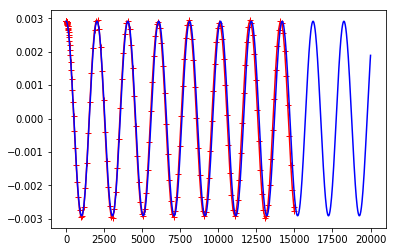

In [30]:
quickProbePlot(tsPath)

## Timestep history 

(This only works as intended if have dumped at every cycle, which outside of testing is unlikely)

A better way to do this now we have diag.f90 for planar is to reccord diag at every dt and note that one of the collums in `diag_vel.out` is that dt. Then you can get it at every time without reccording plotfiles. 

Look at `how_to_read_base_data_without_yt` for info on how to load those files, or `e

In [31]:
def quickTimeDtPlot(tsPath):
    ts = yt.load(tsPath) # I'd love a way to make this quiet
    time = []
    for ds in ts:
        time.append(float(ds.current_time))

    dt = []
    for it, t in enumerate(time):
        try:
            dt.append(time[it+1]-t)
        except: # to avoid indexing oob on the last snapshot
            continue

    time.pop(); # remove the last element

    fig = plt.figure()
    ax = plt.axes()
    ax.plot(dt,'+')
    plt.xlabel('time step')
    plt.ylabel('dt')
    plt.show()

In [32]:
#quickTimeDtPlot(tsPath)

## 2D Movies

#### Note in handover period

Its not actually that useful to display movies inline or have the notebook produce hardcopy.

See `quick_2d_movie.py` instead for ideas about this! 


`quick2DMov` will display inline if save is false (default), or save to the outdir if true

In [33]:
import re # to provide a function to auto-escape special chars in the var name string

def quick2DMov(var,tsPath,outDir,save=False):
    
    if save:
        # make a subdirectory for the particular variable name
        args= " -p " + outDir + '/' + re.escape(var)
        %mkdir $args # the magick will only work in ipython / jupyter - do something smarter in normal scripts

        # remove any existing png in that dir
        args= " " + outDir + re.escape(var) + '/*.png'
        %rm $args

    ts = yt.load(tsPath)
    
    filePath = outDir + '/' + re.escape(var) + "/" 
    filenum = 0
    for ds in ts:
        plot = yt.SlicePlot(ds, "z", var)
        plot.set_log(var, False);
        plot.set_cmap(field=var, cmap='RdBu')
        plot.annotate_title("t = {}".format(ds.current_time) )
        fileName = "{}{:04}.png".format(filePath,filenum)
        if save:
            plot.save(name=fileName)
        else:
            plot.show()
        filenum = filenum + 1

    return
    

This snippet will *save* animations for *all* variables in the plotfile at all times (and likely take a long time!)

In [34]:
# for item in ds0.field_list:
#     var = item[1]
#     print('saving var={}'.format(var))
#     try:
#         quick2DMov(var, tsPath, outDir, save=True)
#     except:
#         print('something went wrong (possibly to do with escaping special characters)')
#         pass

This snippet will save a chosen list of variables

In [35]:
# varlist = ['MachNumber', 'rho', 'rhoh', 'rhopert', 'velx','vely','vort', 'Pi']
#varlist = ['rho', 'rhopert', 'velx','vely', 'Pi']
varlist = ['rhopert']

for var in varlist:
    print('saving var={}'.format(var))
    try:
        quick2DMov(var, tsPath, outDir, save=True)
        print('saved var={}'.format(var))
    except:
        print('something went wrong')
        pass

saving var=rhopert
rm: cannot remove '../single_level/post/rhopert/*.png': No such file or directory
saved var=rhopert


In [36]:
# # varlist = ['MachNumber', 'rho', 'rhoh', 'rhopert', 'velx','vely','vort', 'Pi']
# #varlist = ['rho', 'rhopert', 'velx','vely', 'Pi']
# varlist = ['rhopert']

# for var in varlist:
#     print('saving var={}'.format(var))
#     try:
#         quick2DMov(var, tsPath, outDir, save=False)
#         print('saved var={}'.format(var))
#     except:
#         print('something went wrong')
#         pass